<a href="https://colab.research.google.com/github/Imamahdysabilla/Machine-Learning/blob/main/UAP_ML_Responsi_A_2217051141_Imam_Ahdy_Sabilla.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama: Imam Ahdy Sabilla

Npm: 2217051141

kelas: A

Matkul: UAP Machine Learning (ganjil)

install librarry

In [1]:
!pip install pandas numpy scikit-learn matplotlib seaborn


Import Librray

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split

Load Dataset

menggunakan pd.read csv karena dataset nyaa csv

In [4]:
data = pd.read_csv('https://raw.githubusercontent.com/jhnwlkn/Machine-Leaning/main/financial_stability_dataset.csv')

#Eksplorasi Data

Melihat beberapa baris pertama

In [6]:
print(data.head())

   Monthly Income (k$)  Monthly Expenses (k$)  Savings (k$)   Debt (k$)  \
0           301.381886              32.973187    110.822563  248.429859   
1            87.509803              20.725693     61.192659  147.949023   
2           542.820989              68.495979    180.075334  409.147509   
3           909.769803             771.107937    713.257583  102.750161   
4           534.125605             522.050836   1481.054600  473.567688   

   Credit Score  Age    Education  Number of Dependents  \
0           689   33  High School                     4   
1           306   20   Elementary                     2   
2           528   36   Elementary                     0   
3           308   26    Associate                     3   
4           306   58    Associate                     2   

   Transaction Frequency (transactions/month)  
0                                          13  
1                                           9  
2                                          10  
3 

Melihat informasi umum tentang dataset

In [7]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1326 entries, 0 to 1325
Data columns (total 9 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Monthly Income (k$)                         1326 non-null   float64
 1   Monthly Expenses (k$)                       1326 non-null   float64
 2   Savings (k$)                                1326 non-null   float64
 3   Debt (k$)                                   1326 non-null   float64
 4   Credit Score                                1326 non-null   int64  
 5   Age                                         1326 non-null   int64  
 6   Education                                   1326 non-null   object 
 7   Number of Dependents                        1326 non-null   int64  
 8   Transaction Frequency (transactions/month)  1326 non-null   int64  
dtypes: float64(4), int64(4), object(1)
memory usage: 93.4+ KB
None


Statistik deskriptif dari dataset

In [8]:
print(data.describe())

       Monthly Income (k$)  Monthly Expenses (k$)  Savings (k$)     Debt (k$)  \
count          1326.000000            1326.000000   1326.000000   1326.000000   
mean            439.050143             375.042897    938.605792    388.300896   
std             541.054099             595.744446   1669.176104    779.555339   
min              11.014818               8.342844      7.125673      3.240071   
25%             132.134073             109.886010    191.896787     68.414493   
50%             266.802334             220.984162    451.389207    175.734523   
75%             542.693131             430.510625   1022.403236    405.215771   
max            6412.427258           10687.009510  30026.352065  10375.800484   

       Credit Score          Age  Number of Dependents  \
count   1326.000000  1326.000000           1326.000000   
mean     534.500754    42.758673              2.044495   
std      148.099022    14.741618              1.399292   
min      300.000000    18.000000      

#Preprocessing

In [10]:
# Menggunakan One-Hot Encoding untuk data kategorikal
data_encoded = pd.get_dummies(data, drop_first=True)

# Melihat beberapa baris pertama dari data yang telah di-encode
print(data_encoded.head())

# Normalisasi data yang telah di-encode
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_encoded)


   Monthly Income (k$)  Monthly Expenses (k$)  Savings (k$)   Debt (k$)  \
0           301.381886              32.973187    110.822563  248.429859   
1            87.509803              20.725693     61.192659  147.949023   
2           542.820989              68.495979    180.075334  409.147509   
3           909.769803             771.107937    713.257583  102.750161   
4           534.125605             522.050836   1481.054600  473.567688   

   Credit Score  Age  Number of Dependents  \
0           689   33                     4   
1           306   20                     2   
2           528   36                     0   
3           308   26                     3   
4           306   58                     2   

   Transaction Frequency (transactions/month)  Education_Bachelor  \
0                                          13               False   
1                                           9               False   
2                                          10               False

#Pemilihan Algoritma Clustering

 Menggunakan Algoritma K-Means

Metode Elbow untuk menentukan jumlah cluster

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

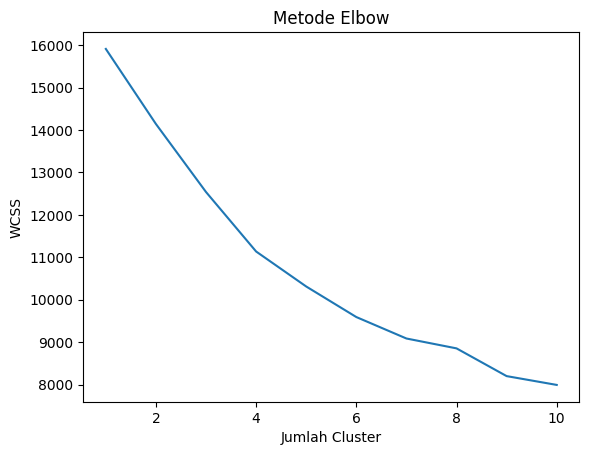

In [11]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Metode Elbow')
plt.xlabel('Jumlah Cluster')
plt.ylabel('WCSS')
plt.show()

Metode Silhouette untuk menentukan jumlah cluster

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

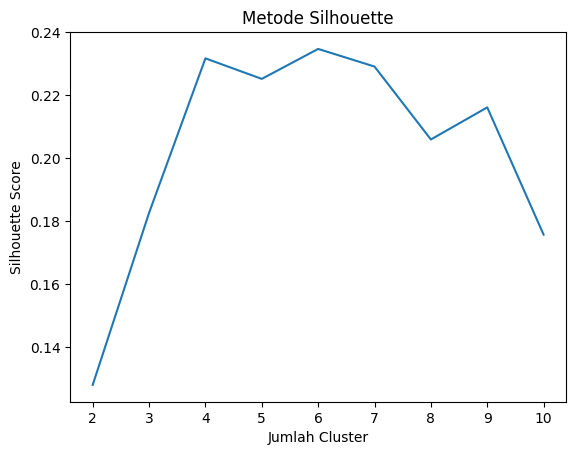

In [12]:
silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(data_scaled)
    silhouette_scores.append(silhouette_score(data_scaled, kmeans.labels_))

plt.plot(range(2, 11), silhouette_scores)
plt.title('Metode Silhouette')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Silhouette Score')
plt.show()

#Membuat Model Clustering

jumlah cluster optimal adalah 3

In [14]:
optimal_clusters = 3

kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans.fit(data_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

Menambahkan label cluster ke data asli

In [15]:
data['Cluster'] = kmeans.labels_

Visualisasi hasil clustering

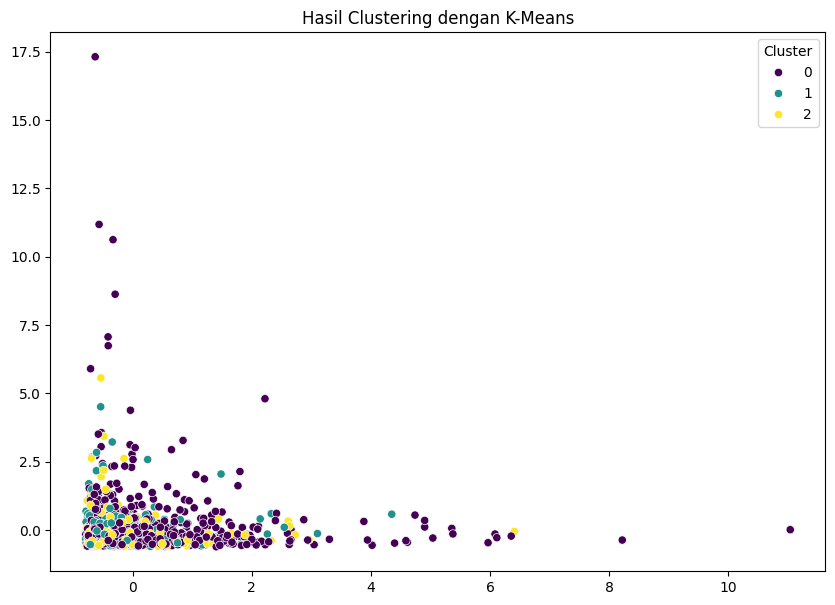

In [16]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x=data_scaled[:, 0], y=data_scaled[:, 1], hue=data['Cluster'], palette='viridis')
plt.title('Hasil Clustering dengan K-Means')
plt.show()

#Evaluasi model

Evaluasi model dengan menggunakan Silhouette Score.

In [17]:
silhouette_avg = silhouette_score(data_scaled, kmeans.labels_)
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.18264728576438669


#Pemilihan Metode

### Alasan Pemilihan Metode K-Means
Metode K-Means dipilih karena sederhana dan cepat dalam mengelompokkan data menjadi beberapa cluster. Algoritma ini cocok untuk dataset yang memiliki struktur cluster yang jelas dan membutuhkan analisis eksplorasi yang mudah.

### Alasan Pemilihan Metode Evaluasi
Metode Silhouette Score digunakan untuk evaluasi karena memberikan indikasi seberapa baik masing-masing objek berada dalam cluster yang sama. Nilai yang lebih tinggi menunjukkan bahwa objek-objek tersebut cocok dengan cluster mereka, dan sebaliknya.
